In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset/MATIC.csv")

In [ ]:
data.head()

,ticker,date,open,high,low,close
0,MATIC,2019-04-30,0.003667,0.005137,0.003667,0.004441
1,MATIC,2019-05-01,0.004441,0.004689,0.004042,0.004366
2,MATIC,2019-05-02,0.004366,0.004841,0.004071,0.004181
3,MATIC,2019-05-03,0.004181,0.004430,0.003912,0.004200
4,MATIC,2019-05-04,0.004200,0.004322,0.003854,0.003971


In [ ]:
data.shape

(1439, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  1439 non-null   object 
 1   date    1439 non-null   object 
 2   open    1439 non-null   float64
 3   high    1439 non-null   float64
 4   low     1439 non-null   float64
 5   close   1439 non-null   float64
dtypes: float64(4), object(2)
memory usage: 67.6+ KB


In [ ]:
data.isna().sum()

ticker    0
date      0
open      0
high      0
low       0
close     0
dtype: int64

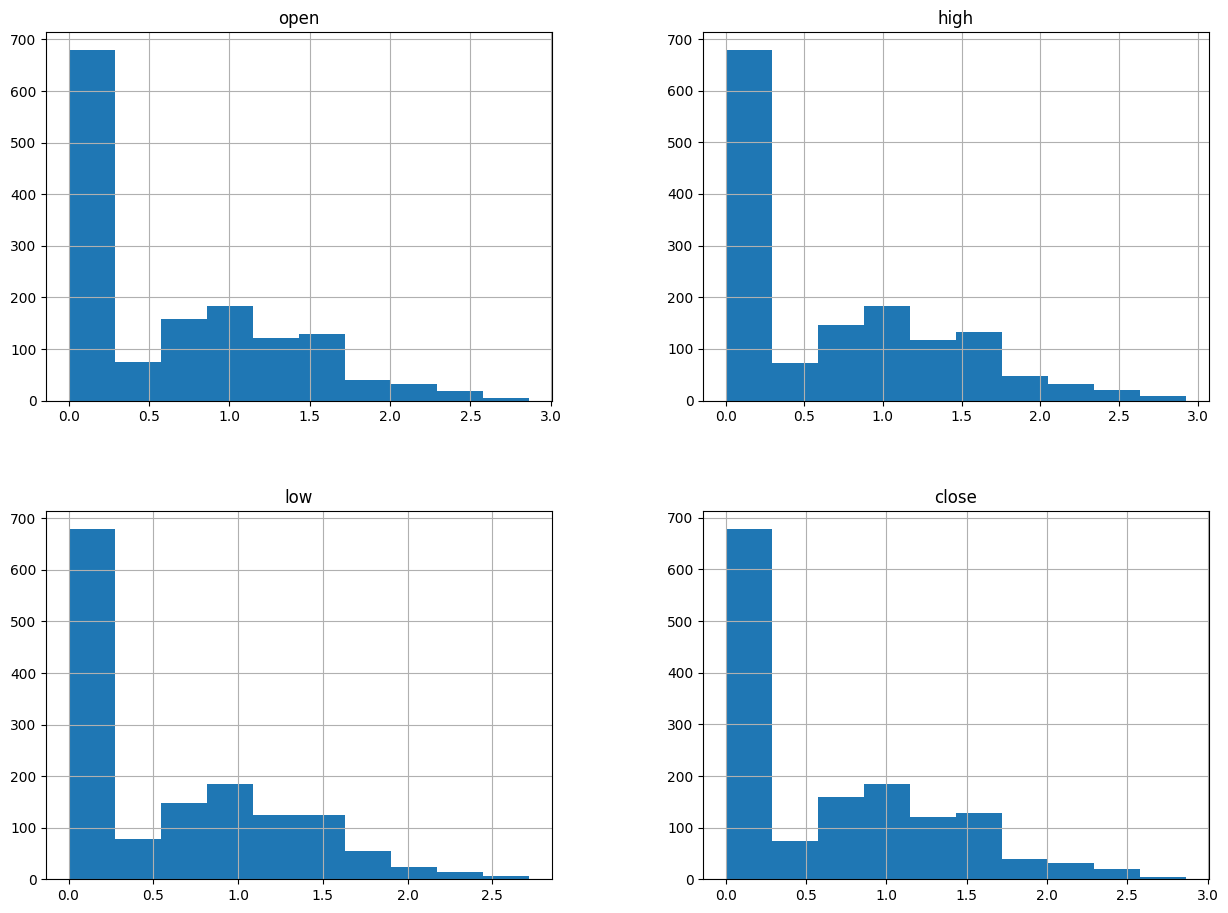

In [ ]:
dgraph = data.select_dtypes(include = ["float"])
dgraph.hist(figsize=(15,11))
plt.show()

In [ ]:
data.columns

Index(['ticker', 'date', 'open', 'high', 'low', 'close'], dtype='object')

In [ ]:
data.ticker.nunique()

1

In [ ]:
data.drop(['ticker', 'date'], axis=1, inplace=True)
data.columns

Index(['open', 'high', 'low', 'close'], dtype='object')

In [ ]:
data.head()

,open,high,low,close
0,0.003667,0.005137,0.003667,0.004441
1,0.004441,0.004689,0.004042,0.004366
2,0.004366,0.004841,0.004071,0.004181
3,0.004181,0.004430,0.003912,0.004200
4,0.004200,0.004322,0.003854,0.003971


Text(0.5, 1.0, 'box plot of open')

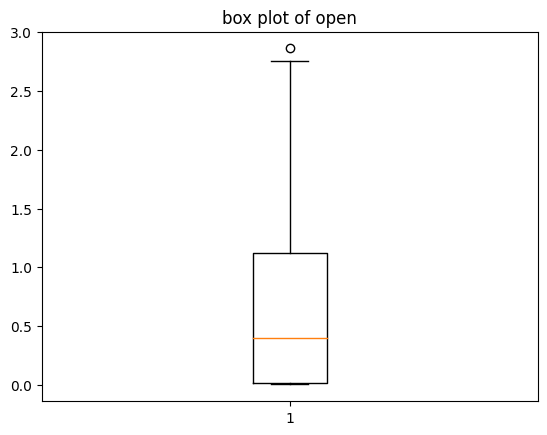

In [ ]:
plt.boxplot(data["open"])
plt.title("box plot of open")

In [ ]:
q1 = np.percentile(data["open"],25, interpolation="midpoint")
q2 = np.percentile(data["open"],50, interpolation="midpoint")
q3 = np.percentile(data["open"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

0.018764999999999997
0.397
1.12086


<ipython-input-13-c993c43b4cf7>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data["open"],25, interpolation="midpoint")
<ipython-input-13-c993c43b4cf7>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(data["open"],50, interpolation="midpoint")
<ipython-input-13-c993c43b4cf7>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np.percentile

In [ ]:
data["open"].median()

0.397

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

-1.6343775
2.7740025


In [ ]:
outlier = []
for x in data["open"]:
  if((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
  
outlier

[2.86143]

In [ ]:
ind1 = data["open"]>upp_limit
data.loc[ind1].index

Int64Index([972], dtype='int64')

In [ ]:
data.drop([972],inplace=True)

Text(0.5, 1.0, 'box plot of open')

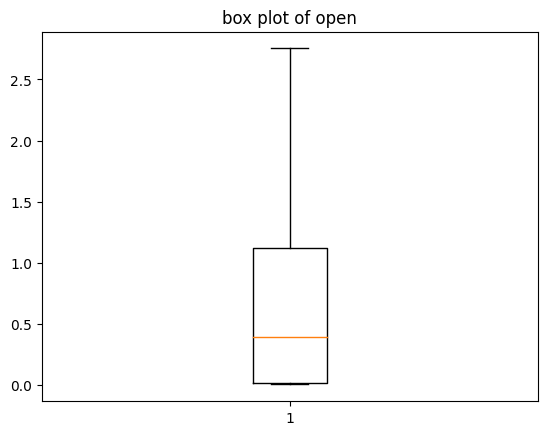

In [ ]:
plt.boxplot(data["open"])
plt.title("box plot of open")

Text(0.5, 1.0, 'box plot of high')

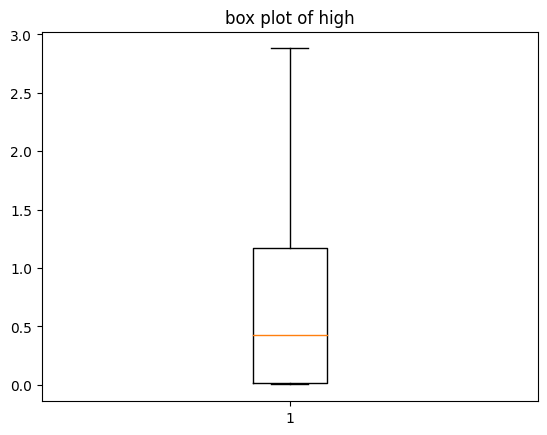

In [ ]:
plt.boxplot(data["high"])
plt.title("box plot of high")

In [ ]:
q1 = np.percentile(data["high"],25, interpolation="midpoint")
q2 = np.percentile(data["high"],50, interpolation="midpoint")
q3 = np.percentile(data["high"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

0.019655
0.4235
1.169155


<ipython-input-22-085ca0c3acb3>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data["high"],25, interpolation="midpoint")
<ipython-input-22-085ca0c3acb3>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(data["high"],50, interpolation="midpoint")
<ipython-input-22-085ca0c3acb3>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np.percentile

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

-1.704595
2.893405


In [ ]:
outlier = []

for x in data["high"]:
  if ((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
outlier

[]

Text(0.5, 1.0, 'box plot of low')

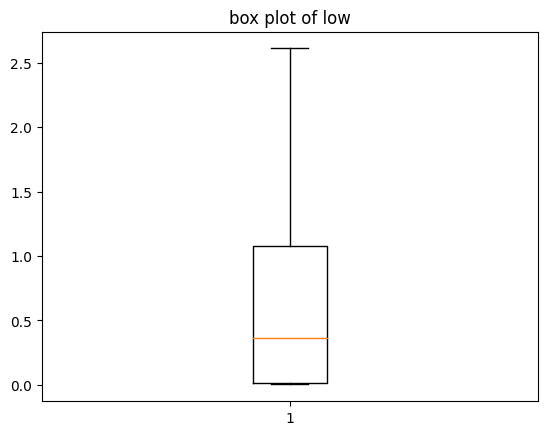

In [ ]:
plt.boxplot(data["low"])
plt.title("box plot of low")

In [ ]:
q1 = np.percentile(data["low"],25, interpolation="midpoint")
q2 = np.percentile(data["low"],50, interpolation="midpoint")
q3 = np.percentile(data["low"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

0.01779
0.3634285
1.075855


<ipython-input-26-3d6c81d80ea2>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data["low"],25, interpolation="midpoint")
<ipython-input-26-3d6c81d80ea2>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(data["low"],50, interpolation="midpoint")
<ipython-input-26-3d6c81d80ea2>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np.percentile(d

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

-1.5693075
2.6629525000000003


In [ ]:
outlier = []

for x in data["low"]:
  if ((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
outlier

[]

Text(0.5, 1.0, 'box plot of close')

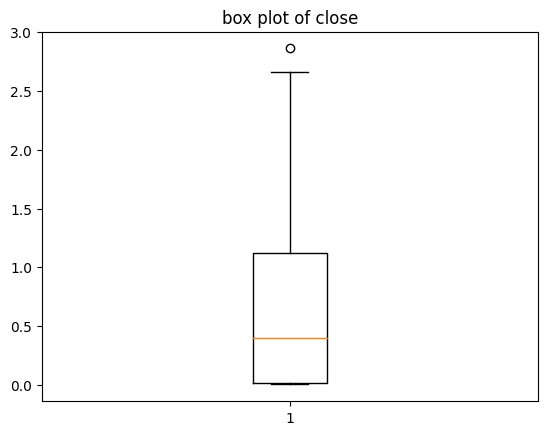

In [ ]:
plt.boxplot(data["close"])
plt.title("box plot of close")

In [ ]:
q1 = np.percentile(data["close"],25, interpolation="midpoint")
q2 = np.percentile(data["close"],50, interpolation="midpoint")
q3 = np.percentile(data["close"],75, interpolation="midpoint")

print(q1)
print(q2)
print(q3)

0.01879
0.39644999999999997
1.1205500000000002


<ipython-input-32-50eeec0b44e2>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(data["close"],25, interpolation="midpoint")
<ipython-input-32-50eeec0b44e2>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(data["close"],50, interpolation="midpoint")
<ipython-input-32-50eeec0b44e2>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np.percenti

In [ ]:
iqr = q3-q1

low_limit = q1-1.5*iqr
upp_limit = q3+1.5*iqr

print(low_limit)
print(upp_limit)

-1.63385
2.7731900000000005


In [ ]:
outlier = []

for x in data["close"]:
  if ((x>upp_limit)or(x<low_limit)):
    outlier.append(x)
outlier

[2.86243]

In [ ]:
ind1 = data["close"]>upp_limit
data.loc[ind1].index

Int64Index([971], dtype='int64')

In [ ]:
data.drop([971],inplace = True)

Text(0.5, 1.0, 'box plot of close')

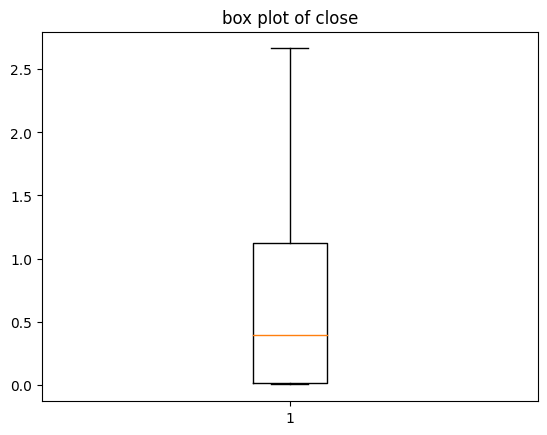

In [ ]:
plt.boxplot(data["close"])
plt.title("box plot of close")

In [ ]:
data.shape

(1437, 4)

<Axes: >

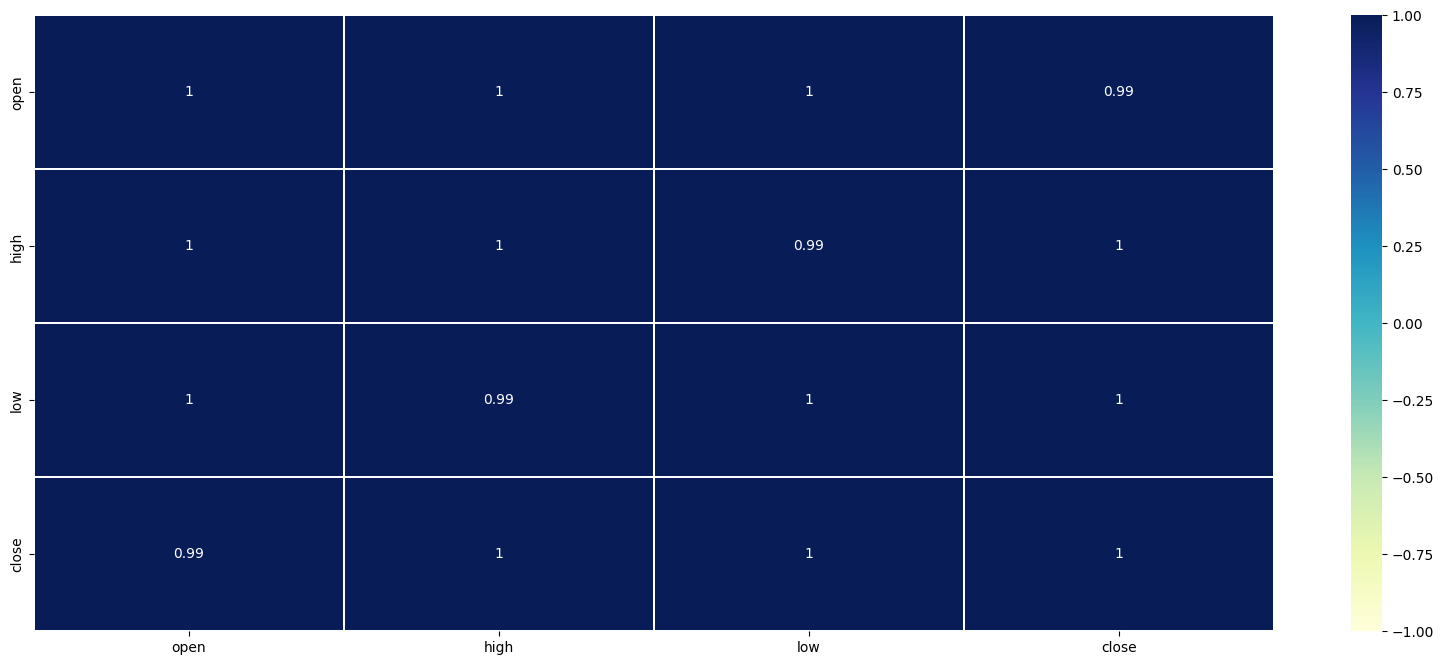

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-1, vmax=1, annot=True, linewidth=0.2, cmap="YlGnBu")

In [ ]:
data.columns
y = data["close"]
x = data.drop("close", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size=0.2)

In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE IS:", mean_squared_error(y_test,prediction))

MSE IS: 0.0005912721289356291


In [ ]:
from sklearn.metrics import r2_score
print("R squared value is :", r2_score(y_test,prediction))

R squared value is : 0.9987086208214755


In [ ]:
x.describe()

,open,high,low
count,1437.000000,1437.000000,1437.000000
mean,0.624191,0.656391,0.592602
std,0.672522,0.707721,0.636595
min,0.003148,0.003518,0.003024
25%,0.018760,0.019650,0.017750
50%,0.391440,0.423400,0.362857
75%,1.118790,1.169050,1.074710
max,2.753830,2.765830,2.502750


In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
from sklearn import preprocessing
standard = preprocessing.StandardScaler()
x = standard.fit_transform(x)

AttributeError: ignored

In [ ]:
x = pd.DataFrame(x)
x.describe()

,0,1,2
count,1437.000000,1.437000e+03,1437.000000
mean,0.000000,1.582280e-16,0.000000
std,1.000348,1.000348e+00,1.000348
min,-0.923775,-9.228221e-01,-0.926466
25%,-0.900553,-9.000199e-01,-0.903325
50%,-0.346207,-3.293282e-01,-0.361023
75%,0.735696,7.246316e-01,0.757585
max,3.167749,2.981645e+00,3.001613


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)

print("MSE IS:", mean_squared_error(y_test,prediction))
print("R squared value is:", r2_score(y_test,prediction))

# standard scalar not done any effet on the dataset

MSE IS: 0.0005912721289356398
R squared value is: 0.9987086208214755


In [ ]:
x = data.drop("close",axis=1)
x.describe()

,open,high,low
count,1437.000000,1437.000000,1437.000000
mean,0.624191,0.656391,0.592602
std,0.672522,0.707721,0.636595
min,0.003148,0.003518,0.003024
25%,0.018760,0.019650,0.017750
50%,0.391440,0.423400,0.362857
75%,1.118790,1.169050,1.074710
max,2.753830,2.765830,2.502750


In [ ]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2
count,1437.000000,1437.000000,1437.000000
mean,0.225778,0.236350,0.235857
std,0.244493,0.256206,0.254666
min,0.000000,0.000000,0.000000
25%,0.005676,0.005840,0.005891
50%,0.141162,0.152004,0.143949
75%,0.405587,0.421941,0.428721
max,1.000000,1.000000,1.000000


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)

print("MSE IS:", mean_squared_error(y_test,prediction))
print("R squared value is:", r2_score(y_test,prediction))

# minmax scalar not done any effect on the dataset

MSE IS: 0.0005912721289356216
R squared value is: 0.9987086208214755


In [ ]:
x = data.drop("close",axis=1)
x.describe()

,open,high,low
count,1437.000000,1437.000000,1437.000000
mean,0.624191,0.656391,0.592602
std,0.672522,0.707721,0.636595
min,0.003148,0.003518,0.003024
25%,0.018760,0.019650,0.017750
50%,0.391440,0.423400,0.362857
75%,1.118790,1.169050,1.074710
max,2.753830,2.765830,2.502750


In [ ]:
x = preprocessing.normalize(x)


In [ ]:
x = pd.DataFrame(x)
x.describe()

,0,1,2
count,1437.000000,1437.000000,1437.000000
mean,0.574781,0.608728,0.545206
std,0.020442,0.026143,0.026964
min,0.423621,0.580226,0.222215
25%,0.567224,0.593114,0.538439
50%,0.576499,0.601217,0.552583
75%,0.584869,0.614234,0.561195
max,0.689126,0.801752,0.574454


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.2)
lr= linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)

print("MSE IS:", mean_squared_error(y_test,prediction))
print("R squared value is:", r2_score(y_test,prediction))

MSE IS: 0.45688090694286565
R squared value is: 0.0021405349284774333


In [ ]:
x = data.drop("close",axis=1)
x.describe()

,open,high,low
count,1437.000000,1437.000000,1437.000000
mean,0.624191,0.656391,0.592602
std,0.672522,0.707721,0.636595
min,0.003148,0.003518,0.003024
25%,0.018760,0.019650,0.017750
50%,0.391440,0.423400,0.362857
75%,1.118790,1.169050,1.074710
max,2.753830,2.765830,2.502750
